In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
col_l0 = "Color_L0_Relative\metrics"
shape_l0 = "ShapeWorld_L0\metrics"
col_s0 = "Color_S0\metrics"
shape_s0 = "ShapeWorld_S0\metrics"

## Train process plots

In [11]:
def plot_col_L0_accs_epoch(path,ids,epoch_num):
    fig, axs = plt.subplots(1, 2, figsize=(10,4))
    axs[0].set_title("Simple L0")
    axs[0].set_xlabel("epoch")
    axs[0].set_ylabel("Accuracy")
    for size,col in zip([10,50,250,1250,6250,31250],["b","r","g","y","m","c"]):
        acc = []
        for id in range(1,ids+1):
            metrics = np.load(path+"/Baseline/baseline-l0_trainSize="+str(size)+"_ID="+str(id)+".npy")
            acc.append(metrics[-1])
        acc = np.array(acc).mean(axis=0)
        axs[0].plot(range(1,epoch_num+1),acc[:epoch_num],color=col,label="data size="+str(size))
    axs[0].set_ylim([0.25,0.8])
    axs[0].legend()
    axs[1].set_title("BERT-CLS L0")
    axs[1].set_xlabel("epoch")
    axs[1].set_ylabel("Accuracy")
    for size,col in zip([10,50,250,1250,6250,31250],["b","r","g","y","m","c"]):
        acc = []
        for id in range(1,ids+1):
            metrics = np.load(path+"/BERT/BERT-CLS-l0_trainSize="+str(size)+"_ID="+str(id)+".npy")
            acc.append(metrics[-1])
        acc = np.array(acc).mean(axis=0)
        axs[1].plot(range(1,epoch_num+1),acc[:epoch_num],color=col,label="data size="+str(size))
    axs[1].set_ylim([0.25,0.8])
    axs[1].legend()
    plt.show()

def plot_shape_L0_accs_epoch(path,ids,epoch_num):
    fig, axs = plt.subplots(1, 2, figsize=(10,4))
    axs[0].set_title("Simple L0")
    axs[0].set_xlabel("epoch")
    axs[0].set_ylabel("Accuracy")
    for size,col in zip([15,60,250,1000,4000],["b","r","g","m","c"]):
        acc = []
        for id in range(1,ids+1):
            metrics = np.load(path+"/Baseline/baseline-l0_trainSize="+str(size)+"_ID="+str(id)+".npy")
            acc.append(metrics[-1])
        acc = np.array(acc).mean(axis=0)
        axs[0].plot(range(1,epoch_num+1),acc[:epoch_num],color=col,label="data size="+str(size))
    axs[0].set_ylim([0.25,1.0])
    axs[0].legend()
    axs[1].set_title("BERT-CLS L0")
    axs[1].set_xlabel("epoch")
    axs[1].set_ylabel("Accuracy")
    for size,col in zip([15,60,250,1000,4000],["b","r","g","m","c"]):
        acc = []
        for id in range(1,ids+1):
            metrics = np.load(path+"/BERT/BERT-CLS-l0_trainSize="+str(size)+"_ID="+str(id)+".npy")
            acc.append(metrics[-1])
        acc = np.array(acc).mean(axis=0)
        axs[1].plot(range(1,epoch_num+1),acc[:epoch_num],color=col,label="data size="+str(size))
    axs[1].set_ylim([0.25,1.0])
    axs[1].legend()
    plt.show()

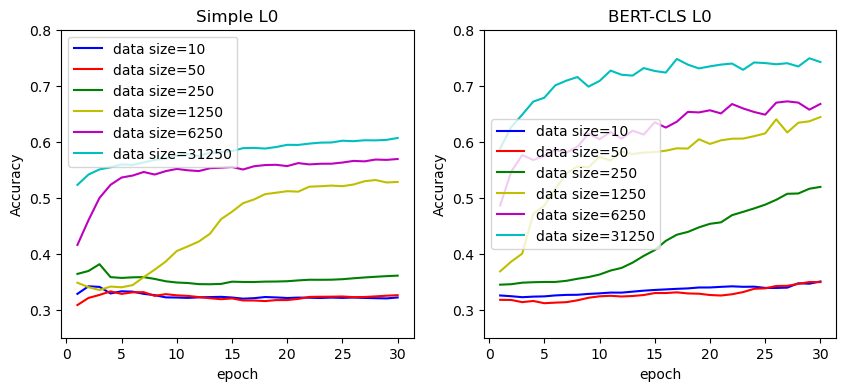

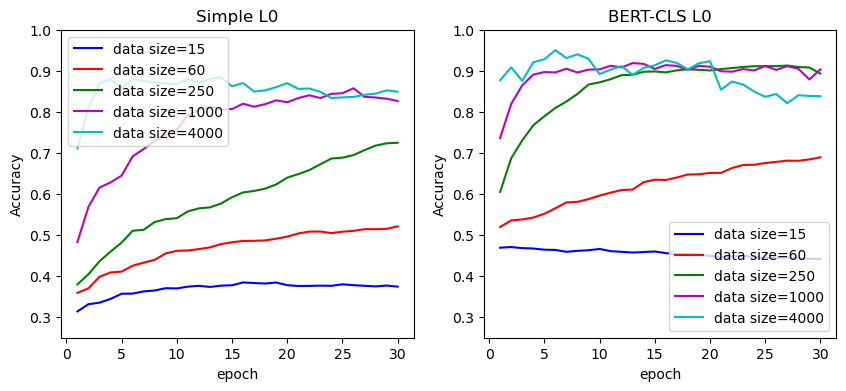

In [23]:
epoch = 30
ids = 5
plot_col_L0_accs_epoch(col_l0,ids,epoch)
plot_shape_L0_accs_epoch(shape_l0,ids,epoch)


In [20]:
def plot_col_s0_accs_epoch(path,acc_type,ids,epoch_num):
    fig, axs = plt.subplots(1, 2, figsize=(10,4))
    axs[0].set_title("Original-RNN S0")
    axs[0].set_xlabel("epoch")
    axs[0].set_ylabel("Accuracy")
    for size,col in zip([10,50,250,1250,6250,31250],["b","r","g","y","m","c"]):
        accs = []
        for id in range(1,ids+1):
            if acc_type=="L0": acc = np.load(path+"/Baseline/baseline-s0_trainSize="+str(size)+"_ID="+str(id)+".npy")[2]
            else: acc = np.load(path+"/Baseline/baseline-s0_trainSize="+str(size)+"_ID="+str(id)+".npy")[3]
            accs.append(acc)
        accs = np.array(accs).mean(axis=0)
        axs[0].plot(range(1,epoch_num+1),accs[:epoch_num],color=col,label="data size="+str(size))
    if acc_type=="L0":
        axs[0].set_ylim([0.25,0.9])
    else:
        axs[0].set_ylim([0.0,0.7])
    axs[0].legend()
    axs[1].set_title("All-fine-tuned GPT2 S0")
    axs[1].set_xlabel("epoch")
    axs[1].set_ylabel("Accuracy")
    for size,col in zip([10,50,250,1250,6250,31250],["b","r","g","y","m","c"]):
        accs = []
        for id in range(1,ids+1):
            if acc_type=="L0": acc = np.load(path+"/GPT2/gpt2-s0_trainSize="+str(size)+"_ID="+str(id)+".npy")[2]
            else: acc = np.load(path+"/GPT2/gpt2-s0_trainSize="+str(size)+"_ID="+str(id)+".npy")[3]
            accs.append(acc)
        accs = np.array(accs).mean(axis=0)
        axs[1].plot(range(1,epoch_num+1),accs[:epoch_num],color=col,label="data size="+str(size))
    if acc_type=="L0":
        axs[1].set_ylim([0.25,0.9])
    else:
        axs[1].set_ylim([0.0,0.7])
    axs[1].legend()
    plt.show()

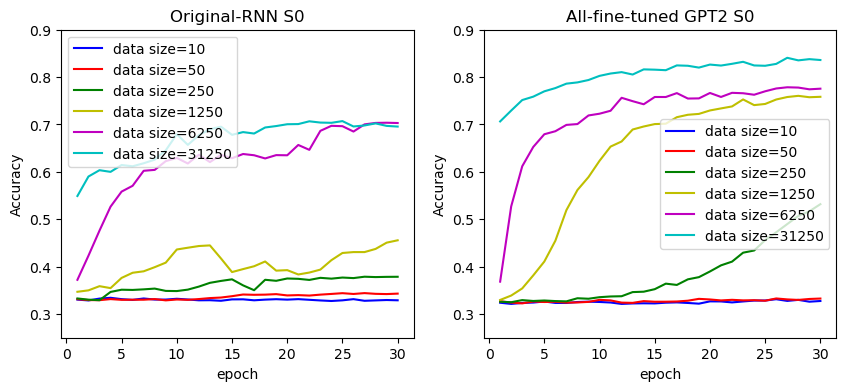

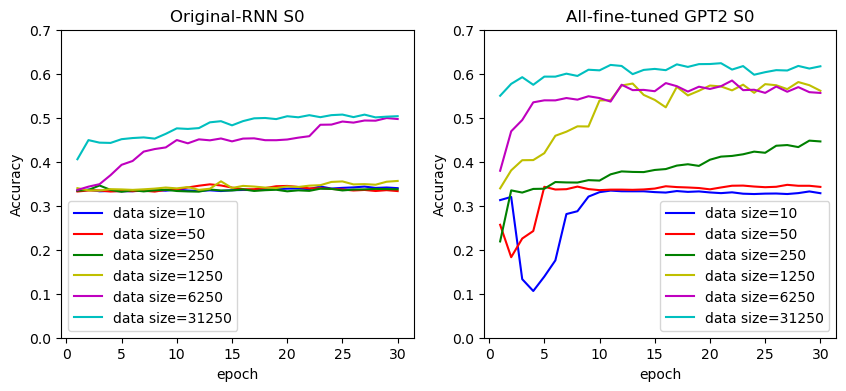

In [21]:
epoch = 30
ids = 3
print("L0")
plot_col_s0_accs_epoch(col_s0,acc_type="L0",ids=ids,epoch_num=epoch)
print("L1")
plot_col_s0_accs_epoch(col_s0,acc_type="L1",ids=ids,epoch_num=epoch)

In [31]:
def plot_shape_s0_accs_epoch(path,acc_type,ids,epoch_num):
    fig, axs = plt.subplots(1, 2, figsize=(10,4))
    axs[0].set_title("Original-RNN S0")
    axs[0].set_xlabel("epoch")
    axs[0].set_ylabel("Accuracy")
    for size,col in zip([15,60,250,1000,4000],["b","r","g","m","c"]):
        accs = []
        for id in range(1,ids+1):
            if acc_type=="L0": acc = np.load(path+"/Baseline/baseline-s0_trainSize="+str(size)+"_epoch=50_ID="+str(id)+".npy")[2]
            else: acc = np.load(path+"/Baseline/baseline-s0_trainSize="+str(size)+"_epoch=50_ID="+str(id)+".npy")[3]
            accs.append(acc)
        accs = np.array(accs).mean(axis=0)
        axs[0].plot(range(1,epoch_num+1),accs[:epoch_num],color=col,label="data size="+str(size))
    if acc_type=="L0":
        axs[0].set_ylim([0.25,0.7])
    else:
        axs[0].set_ylim([0.25,0.8])
    axs[0].legend()
    axs[1].set_title("All-fine-tuned GPT2 S0")
    axs[1].set_xlabel("epoch")
    axs[1].set_ylabel("Accuracy")
    for size,col in zip([15,60,250,1000,4000],["b","r","g","m","c"]):
        accs = []
        for id in range(1,ids+1):
            if acc_type=="L0": acc = np.load(path+"/GPT2/gpt2-s0_trainSize="+str(size)+"_epoch=50_ID="+str(id)+".npy")[2]
            else: acc = np.load(path+"/GPT2/gpt2-s0_trainSize="+str(size)+"_epoch=50_ID="+str(id)+".npy")[3]
            accs.append(acc)
        accs = np.array(accs).mean(axis=0)
        axs[1].plot(range(1,epoch_num+1),accs[:epoch_num],color=col,label="data size="+str(size))
    if acc_type=="L0":
        axs[1].set_ylim([0.25,0.7])
    else:
        axs[1].set_ylim([0.25,0.8])
    axs[1].legend()
    plt.show()

L0


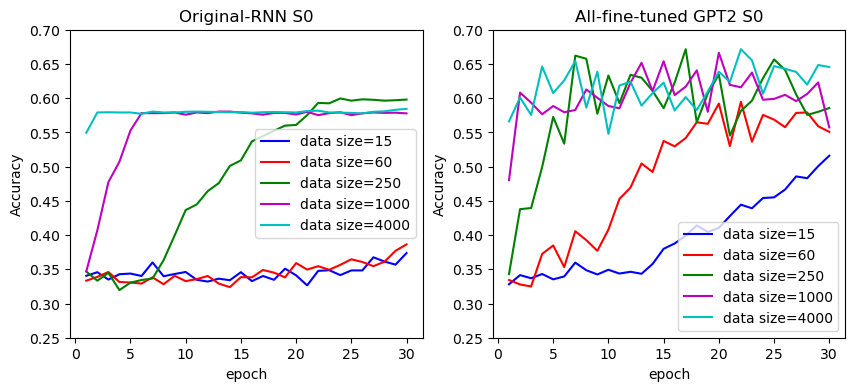

L1


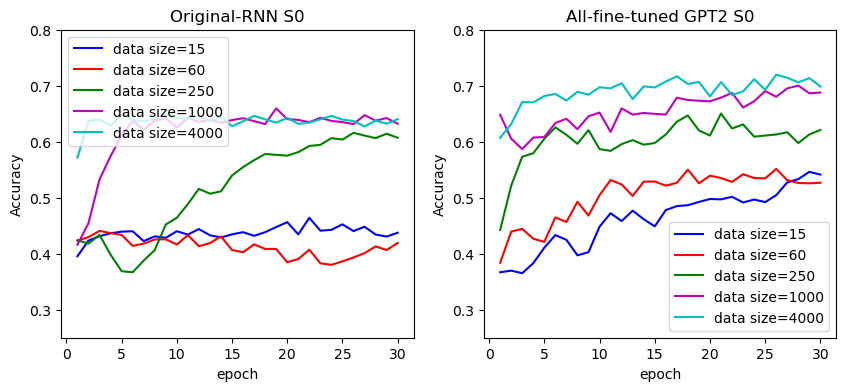

In [32]:
epoch = 30
ids = 3
print("L0")
plot_shape_s0_accs_epoch(shape_s0,acc_type="L0",ids=ids,epoch_num=epoch)
print("L1")
plot_shape_s0_accs_epoch(shape_s0,acc_type="L1",ids=ids,epoch_num=epoch)

## train size VS accuracy

In [46]:
def plot_col_L0_accs_size(path,ids,epoch_num):
    plt.figure()
    plt.title("Data size VS Accuracy")
    plt.xlabel("Data size")
    plt.ylabel("Accuracy")
    base_accs = []
    for size,col in zip([10,50,250,1250,6250,31250],["b","r","g","y","m","c"]):
        acc = []
        for id in range(1,ids+1):
            metrics = np.load(path+"/Baseline/baseline-l0_trainSize="+str(size)+"_ID="+str(id)+".npy")
            acc.append(metrics[-1])
        base_accs.append(max(np.array(acc).mean(axis=0)[:epoch_num]))
    plt.plot(list(map(str,[10,50,250,1250,6250,31250])),base_accs,color="b",label="Simple L0")
    bert_accs = []
    for size,col in zip([10,50,250,1250,6250,31250],["b","r","g","y","m","c"]):
        acc = []
        for id in range(1,ids+1):
            metrics = np.load(path+"/BERT/BERT-CLS-l0_trainSize="+str(size)+"_ID="+str(id)+".npy")
            acc.append(metrics[-1])
        bert_accs.append(max(np.array(acc).mean(axis=0)[:epoch_num]))
    plt.plot(list(map(str,[10,50,250,1250,6250,31250])),bert_accs,color="r",label="BERT-CLS L0")
    plt.ylim([0.25,0.8])
    plt.legend()
    plt.show()

def plot_shape_L0_accs_size(path,ids,epoch_num):
    plt.figure()
    plt.title("Data size VS Accuracy")
    plt.xlabel("Data size")
    plt.ylabel("Accuracy")
    base_accs = []
    for size,col in zip([15,60,250,1000,4000],["b","r","g","m","c"]):
        acc = []
        for id in range(1,ids+1):
            metrics = np.load(path+"/Baseline/baseline-l0_trainSize="+str(size)+"_ID="+str(id)+".npy")
            acc.append(metrics[-1])
        base_accs.append(max(np.array(acc).mean(axis=0)[:epoch_num]))
    plt.plot(list(map(str,[15,60,250,1000,4000])),base_accs,color="b",label="Simple L0")
    bert_accs = []
    for size,col in zip([15,60,250,1000,4000],["b","r","g","m","c"]):
        acc = []
        for id in range(1,ids+1):
            metrics = np.load(path+"/BERT/BERT-CLS-l0_trainSize="+str(size)+"_ID="+str(id)+".npy")
            acc.append(metrics[-1])
        bert_accs.append(max(np.array(acc).mean(axis=0)[:epoch_num]))
    plt.plot(list(map(str,[15,60,250,1000,4000])),bert_accs,color="r",label="BERT-CLS L0")
    plt.ylim([0.25,1.0])
    plt.legend()
    plt.show()

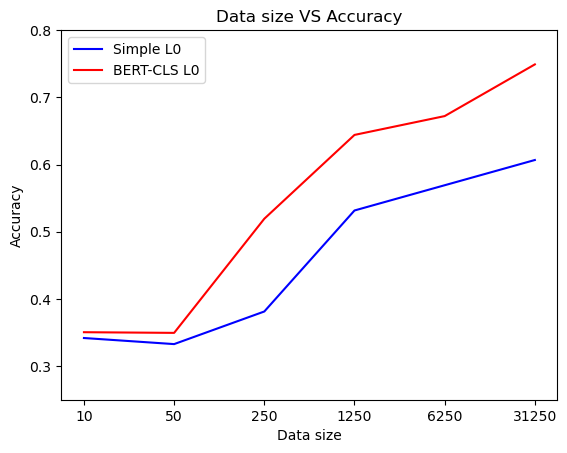

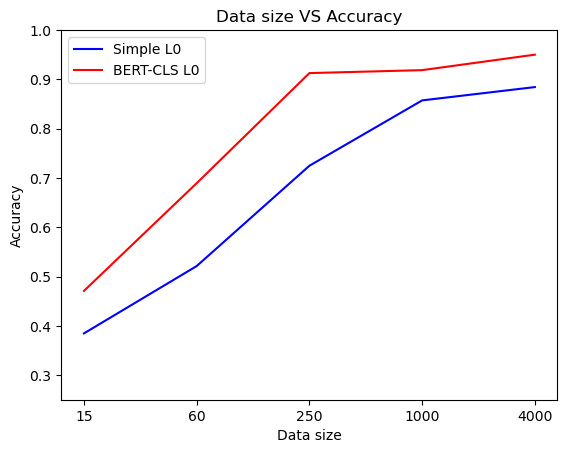

In [47]:
epoch = 30
ids = 5
plot_col_L0_accs_size(col_l0,ids,epoch)
plot_shape_L0_accs_size(shape_l0,ids,epoch)

### Significant test

In [73]:
from scipy import stats

ids=5
path = shape_l0

base_acc250 = []
base_acc4000 = []
bert_acc250 = []
bert_acc4000 = []
for id in range(1,ids+1):
    base_acc250.append(max(np.load(path+"/Baseline/baseline-l0_trainSize="+str(250)+"_ID="+str(id)+".npy")[-1]))
    base_acc4000.append(max(np.load(path+"/Baseline/baseline-l0_trainSize="+str(4000)+"_ID="+str(id)+".npy")[-1]))
    bert_acc250.append(max(np.load(path+"/BERT/BERT-CLS-l0_trainSize="+str(250)+"_ID="+str(id)+".npy")[-1]))
    bert_acc4000.append(max(np.load(path+"/BERT/BERT-CLS-l0_trainSize="+str(4000)+"_ID="+str(id)+".npy")[-1]))
print(base_acc250)
print(bert_acc250)
print(base_acc4000)
print(bert_acc4000)


print(stats.ttest_ind(base_acc250,bert_acc250))
print(stats.ttest_ind(base_acc4000,bert_acc4000))


[0.593, 0.702, 0.784, 0.745, 0.808]
[0.931, 0.921, 0.95, 0.866, 0.95]
[0.901, 0.927, 0.929, 0.782, 0.928]
[0.975, 0.941, 0.967, 0.945, 0.971]
Ttest_indResult(statistic=-4.819341239059416, pvalue=0.0013224752798777688)
Ttest_indResult(statistic=-2.274693029169217, pvalue=0.052504437839637874)


In [84]:
from scipy import stats

ids=5
path = shape_l0

base_acc250 = []
bert_acc250 = []
for id in range(1,ids+1):
    acc250 = np.load(path+"/Baseline/baseline-l0_trainSize="+str(250)+"_ID="+str(id)+".npy")[-1]
    e = 0
    for acc in acc250:
        if acc>0.7:
            e+=1
            break
        e+=1
    base_acc250.append(e)
    bertacc250 = np.load(path+"/BERT/BERT-CLS-l0_trainSize="+str(250)+"_ID="+str(id)+".npy")[-1]
    e = 0
    for acc in bertacc250:
        if acc>0.7:
            e+=1
            break
        e+=1
    bert_acc250.append(e)

print(base_acc250)
print(bert_acc250)
print(stats.ttest_ind(base_acc250,bert_acc250))


[30, 30, 18, 20, 20]
[2, 2, 1, 6, 3]
Ttest_indResult(statistic=7.4957996896270505, pvalue=6.95535833479707e-05)


In [53]:
def plot_col_S0_accs_size(type,path,ids,epoch_num):
    plt.figure()
    plt.title("Data size VS Accuracy")
    plt.xlabel("Data size")
    plt.ylabel("Accuracy")
    base_accs = []
    for size,col in zip([10,50,250,1250,6250,31250],["b","r","g","y","m","c"]):
        acc = []
        for id in range(1,ids+1):
            metrics = np.load(path+"/Baseline/baseline-s0_trainSize="+str(size)+"_ID="+str(id)+".npy")
            if type=="L0":
                acc.append(metrics[2])
            else:
                acc.append(metrics[3])
        base_accs.append(max(np.array(acc).mean(axis=0)[:epoch_num]))
    plt.plot(list(map(str,[10,50,250,1250,6250,31250])),base_accs,color="b",label="Original-RNN S0")
    bert_accs = []
    for size,col in zip([10,50,250,1250,6250,31250],["b","r","g","y","m","c"]):
        acc = []
        for id in range(1,ids+1):
            metrics = np.load(path+"/GPT2/gpt2-s0_trainSize="+str(size)+"_ID="+str(id)+".npy")
            if type=="L0":
                acc.append(metrics[2])
            else:
                acc.append(metrics[3])
        bert_accs.append(max(np.array(acc).mean(axis=0)[:epoch_num]))
    plt.plot(list(map(str,[10,50,250,1250,6250,31250])),bert_accs,color="r",label="All-fine-tuned GPT-2 S0")
    plt.ylim([0.25,0.9])
    plt.legend()
    plt.show()

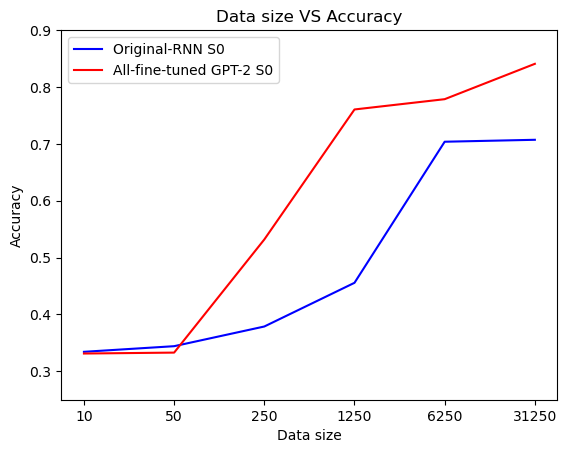

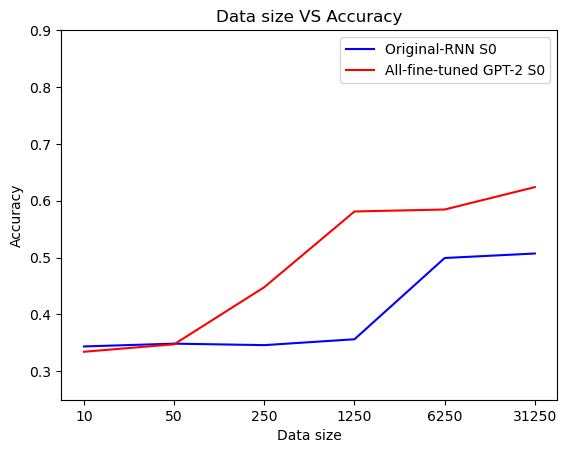

In [54]:
epoch = 30
ids = 3
plot_col_S0_accs_size("L0",col_s0,ids,epoch)
plot_col_S0_accs_size("L1",col_s0,ids,epoch)

In [62]:
def plot_shape_S0_accs_size(type,path,ids,epoch_num):
    plt.figure()
    plt.title("Data size VS Accuracy")
    plt.xlabel("Data size")
    plt.ylabel("Accuracy")
    base_accs = []
    for size,col in zip([15,60,250,1000,4000],["b","r","g","y","m","c"]):
        acc = []
        for id in range(1,ids+1):
            metrics = np.load(path+"/Baseline/baseline-s0_trainSize="+str(size)+"_epoch=50_ID="+str(id)+".npy")
            if type=="L0":
                acc.append(metrics[2])
            else:
                acc.append(metrics[3])
        base_accs.append(max(np.array(acc).mean(axis=0)[:epoch_num]))
    plt.plot(list(map(str,[15,60,250,1000,4000])),base_accs,color="b",label="Original-RNN S0")
    bert_accs = []
    for size,col in zip([15,60,250,1000,4000],["b","r","g","y","m","c"]):
        acc = []
        for id in range(1,ids+1):
            metrics = np.load(path+"/GPT2/gpt2-s0_trainSize="+str(size)+"_epoch=50_ID="+str(id)+".npy")
            if type=="L0":
                acc.append(metrics[2])
            else:
                acc.append(metrics[3])
        bert_accs.append(max(np.array(acc).mean(axis=0)[:epoch_num]))
    plt.plot(list(map(str,[15,60,250,1000,4000])),bert_accs,color="r",label="All-fine-tuned GPT-2 S0")
    plt.ylim([0.35,0.75])
    plt.legend()
    plt.show()

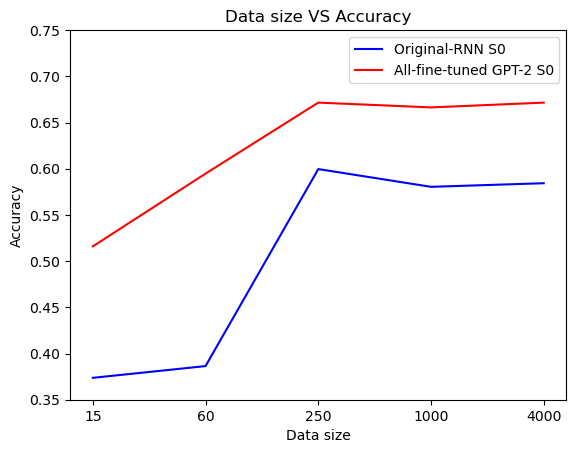

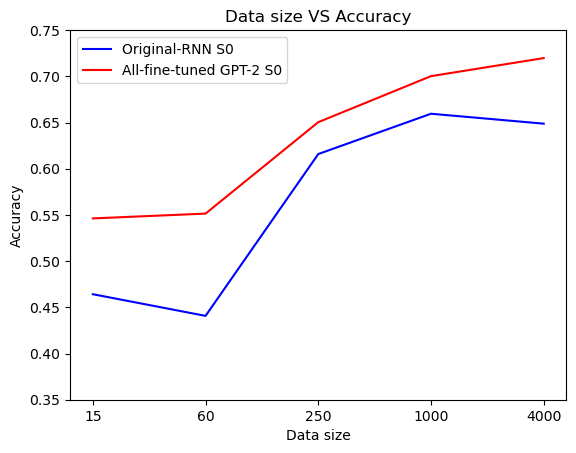

In [63]:
epoch = 30
ids = 3
plot_shape_S0_accs_size("L0",shape_s0,ids,epoch)
plot_shape_S0_accs_size("L1",shape_s0,ids,epoch)

### Significant test

In [82]:
from scipy import stats
ids=3
path = shape_s0
base_acc_small = []
base_acc_large = []
bert_acc_small = []
bert_acc_large = []
for id in range(1,ids+1):
    base_acc_small.append(max(np.load(path+"/Baseline/baseline-s0_trainSize="+str(250)+"_epoch=50_ID="+str(id)+".npy")[-2]))
    base_acc_large.append(max(np.load(path+"/Baseline/baseline-s0_trainSize="+str(4000)+"_epoch=50_ID="+str(id)+".npy")[-2]))
    bert_acc_small.append(max(np.load(path+"/GPT2/gpt2-s0_trainSize="+str(250)+"_epoch=50_ID="+str(id)+".npy")[-2]))
    bert_acc_large.append(max(np.load(path+"/GPT2/gpt2-s0_trainSize="+str(4000)+"_epoch=50_ID="+str(id)+".npy")[-2]))
print(stats.ttest_ind(base_acc_small,bert_acc_small))
print(stats.ttest_ind(base_acc_large,bert_acc_large))

Ttest_indResult(statistic=-7.349743608985611, pvalue=0.0018250673256776117)
Ttest_indResult(statistic=-2.051902285714729, pvalue=0.10945364893856617)


In [87]:
from scipy import stats

ids=3
path = shape_s0

base_acc250 = []
bert_acc250 = []
for id in range(1,ids+1):
    acc250 = np.load(path+"/Baseline/baseline-s0_trainSize="+str(250)+"_epoch=50_ID="+str(id)+".npy")[-1]
    e = 0
    for acc in acc250:
        if acc>0.55:
            e+=1
            break
        e+=1
    base_acc250.append(e)
    bertacc250 = np.load(path+"/GPT2/gpt2-s0_trainSize="+str(250)+"_epoch=50_ID="+str(id)+".npy")[-1]
    e = 0
    for acc in bertacc250:
        if acc>0.55:
            e+=1
            break
        e+=1
    bert_acc250.append(e)

print(base_acc250)
print(bert_acc250)
print(stats.ttest_ind(base_acc250,bert_acc250))

[23, 17, 12]
[3, 4, 4]
Ttest_indResult(statistic=4.274545488170033, pvalue=0.01290343140592786)
